In [122]:
!pip install scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
import numpy as np
import warnings

# Disable all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


A. Preprocessing data

In [100]:
# Read the CSV file without header
df = pd.read_csv('D:/STUDY/STUDY/PYTHON/congress vote/votes84.csv', header=None)

# Define the header titles
add_header = ['party','infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid',
              'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_export', 'eaa_rsa']

# Assign the header row to the DataFrame
df.columns = add_header

# Print the updated DataFrame
print(df.head())
df.head()

        party infants water budget physician salvador religious satellite aid  \
0  republican       n     y      n         y        y         y         n   n   
1  republican       n     y      n         y        y         y         n   n   
2    democrat       ?     y      y         ?        y         y         n   n   
3    democrat       n     y      y         n        ?         y         n   n   
4    democrat       y     y      y         n        y         y         n   n   

  missile immigration synfuels education superfund crime duty_free_export  \
0       n           y        ?         y         y     y                n   
1       n           n        n         y         y     y                n   
2       n           n        y         n         y     y                n   
3       n           n        y         n         y     n                n   
4       n           n        y         ?         y     y                y   

  eaa_rsa  
0       y  
1       ?  
2       n  
3 

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_export,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [101]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())
df.head()

party                 0
infants              12
water                48
budget               11
physician            11
salvador             15
religious            11
satellite            14
aid                  15
missile              22
immigration           7
synfuels             21
education            31
superfund            25
crime                17
duty_free_export     28
eaa_rsa             104
dtype: int64


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_export,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [102]:
# Check if column exists and has object data type
def transform_to_numeric(df, columns):
    mapping = {"y": 1, "n": 0}
    for col in columns:
        if col in df.columns and df[col].dtype == object:  
            df[col] = df[col].map(mapping)
    return df

# Specify columns to be transformed
columns_to_transform = ['infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid',
              'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_export', 'eaa_rsa']
numeric_df = transform_to_numeric(df, columns_to_transform)
numeric_df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_export,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


Base on the result above it look like nearly half of total data is missing -> drop them all is unacceptable -> Ideally, inpute missing value using SimpleImputer(or Imputer)

In [103]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with strategy set to 'most_frequent' and fill_value set to NaN
imp = SimpleImputer(strategy='most_frequent', fill_value='NaN')

# Fit the imputer on your data X
imp.fit(numeric_df)

# Transform your data X using the imputer
numeric_df = imp.transform(numeric_df)
numeric_df

array([['republican', 0.0, 1.0, ..., 1.0, 0.0, 1.0],
       ['republican', 0.0, 1.0, ..., 1.0, 0.0, 1.0],
       ['democrat', 0.0, 1.0, ..., 1.0, 0.0, 0.0],
       ...,
       ['republican', 0.0, 1.0, ..., 1.0, 0.0, 1.0],
       ['republican', 0.0, 0.0, ..., 1.0, 0.0, 1.0],
       ['republican', 0.0, 1.0, ..., 1.0, 0.0, 0.0]], dtype=object)

In [104]:
# Convert numpy array to Pandas DataFrame
df = pd.DataFrame(numeric_df, columns=['party','infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid',
              'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_export', 'eaa_rsa'])

# Display the first few rows of the DataFrame
df.head()


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_export,eaa_rsa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [123]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'party' column in the DataFrame
df['party'] = le.fit_transform(df['party'])

# Create arrays X and y for the features and the target variable correspondingly
y = df['party'].values
X = df.drop('party', axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Print the accuracy
print(knn.score(X_test, y_test))
print(knn.score(X_train, y_train))


0.9770114942528736
0.9482758620689655


In [120]:
df['party']

0      1
1      1
2      0
3      0
4      0
      ..
430    1
431    0
432    1
433    1
434    1
Name: party, Length: 435, dtype: int64

SUMMARY: We split data into train and test then fit 

A random unlabeled data point has been generated for predicting and is available to you as X_new.
- You can still use the .predict() method on the X that was used to fit the model (imagine like you do an exercise with the result has already presented to you), but it is not a good indicator of the model's ability to generalize to new, unseen data.
- You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample

In [119]:
X_new = pd.read_csv('D:/STUDY/STUDY/PYTHON/congress vote/x_new.csv')

# Specify columns to be transformed
columns_to_transform = ['infants', 'water', 'budget', 'physician', 'salvador', 'religious', 'satellite', 'aid',
              'missile', 'immigration', 'synfuels', 'education', 'superfund', 'crime', 'duty_free_export', 'eaa_rsa']
X_new_numeric = transform_to_numeric(X_new, columns_to_transform)
X_new_numeric.head()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_export,eaa_rsa
0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
1,0,1,0,1,1,0,0,0,0,0,1,0,1,1,0,0
2,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1
4,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1


In [132]:
# Remove feature names from input data
X_new_numeric_without_names = X_new_numeric.values

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new_numeric_without_names)

def predicted_party(new_prediction):
    party_result = []
    for p in new_prediction:
        if p == 1:
            party_result.append('republican')
        else:
            party_result.append('democrat')
    return party_result

run_pred = predicted_party(new_prediction)

# Convert list to Pandas DataFrame
party_result = pd.DataFrame(run_pred, columns=['predicted_party'])
print(party_result)


  predicted_party
0        democrat
1      republican
2      republican
3        democrat
4        democrat


B. Some knowing about dataset

In the IPython Shell, explore the voting behavior further by generating countplots for the 'satellite' and 'missile' bills. Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans? 

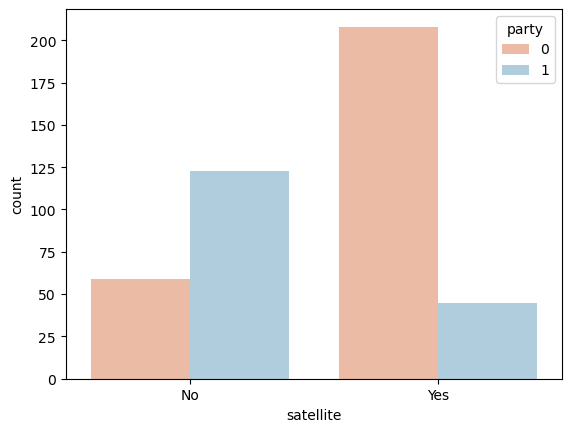

In [133]:
plt.figure()
sns.countplot(x='satellite', hue = 'party', data = df, palette = 'RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

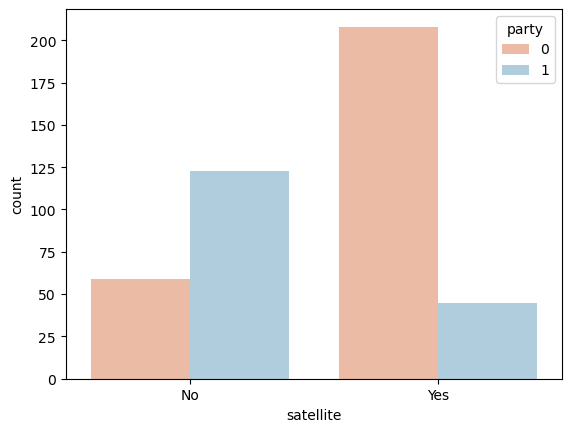

In [109]:
plt.figure()
sns.countplot(x='satellite', hue = 'party', data = df, palette = 'RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively